In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
bank_marketing = fetch_ucirepo(id=222) 

X = bank_marketing.data.features 
y = bank_marketing.data.targets

In [3]:
X.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [4]:
X = X.dropna(subset = ["job", "education"])
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN


In [5]:
X = X.drop("contact", axis=1)
X = X.drop("poutcome", axis=1)
X.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0


In [6]:
X.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
dtype: int64

In [7]:
datos = X.join(y)
datos

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


In [8]:
y = datos[['y']]
y

,y
0,no
1,no
2,no
5,no
6,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [9]:
X = datos.drop("y", axis=1)
X

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0


In [10]:
#Dummies: job, marital
#Encoder: default, housing, loan
#Encoder (map): education, month

In [11]:
X = pd.get_dummies(X, columns=["job", "marital"])
X.head()

,age,education,default,balance,housing,loan,day_of_week,month,duration,campaign,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,yes,no,5,may,261,1,...,True,False,False,False,False,False,False,False,True,False
1,44,secondary,no,29,yes,no,5,may,151,1,...,False,False,False,False,False,True,False,False,False,True
2,33,secondary,no,2,yes,yes,5,may,76,1,...,False,False,False,False,False,False,False,False,True,False
5,35,tertiary,no,231,yes,no,5,may,139,1,...,True,False,False,False,False,False,False,False,True,False
6,28,tertiary,no,447,yes,yes,5,may,217,1,...,True,False,False,False,False,False,False,False,False,True


In [12]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [13]:
X.loc[:,"default"] = encoder.fit_transform(X[["default"]])
X.loc[:,"housing"] = encoder.fit_transform(X[["housing"]])
X.loc[:,"loan"] = encoder.fit_transform(X[["loan"]])
X.head()

,age,education,default,balance,housing,loan,day_of_week,month,duration,campaign,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,58,tertiary,0.0,2143,1.0,0.0,5,may,261,1,...,True,False,False,False,False,False,False,False,True,False
1,44,secondary,0.0,29,1.0,0.0,5,may,151,1,...,False,False,False,False,False,True,False,False,False,True
2,33,secondary,0.0,2,1.0,1.0,5,may,76,1,...,False,False,False,False,False,False,False,False,True,False
5,35,tertiary,0.0,231,1.0,0.0,5,may,139,1,...,True,False,False,False,False,False,False,False,True,False
6,28,tertiary,0.0,447,1.0,1.0,5,may,217,1,...,True,False,False,False,False,False,False,False,False,True


In [14]:
map_dict = {'primary':1, 'secondary':2, 'tertiary':3}
X["education"] = X["education"].map(map_dict)
X.head()

,age,education,default,balance,housing,loan,day_of_week,month,duration,campaign,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,58,3,0.0,2143,1.0,0.0,5,may,261,1,...,True,False,False,False,False,False,False,False,True,False
1,44,2,0.0,29,1.0,0.0,5,may,151,1,...,False,False,False,False,False,True,False,False,False,True
2,33,2,0.0,2,1.0,1.0,5,may,76,1,...,False,False,False,False,False,False,False,False,True,False
5,35,3,0.0,231,1.0,0.0,5,may,139,1,...,True,False,False,False,False,False,False,False,True,False
6,28,3,0.0,447,1.0,1.0,5,may,217,1,...,True,False,False,False,False,False,False,False,False,True


In [15]:
map_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
X["month"] = X["month"].map(map_dict)
X.head()

,age,education,default,balance,housing,loan,day_of_week,month,duration,campaign,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,58,3,0.0,2143,1.0,0.0,5,5,261,1,...,True,False,False,False,False,False,False,False,True,False
1,44,2,0.0,29,1.0,0.0,5,5,151,1,...,False,False,False,False,False,True,False,False,False,True
2,33,2,0.0,2,1.0,1.0,5,5,76,1,...,False,False,False,False,False,False,False,False,True,False
5,35,3,0.0,231,1.0,0.0,5,5,139,1,...,True,False,False,False,False,False,False,False,True,False
6,28,3,0.0,447,1.0,1.0,5,5,217,1,...,True,False,False,False,False,False,False,False,False,True


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size = 0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34554, 26), (8639, 26), (34554, 1), (8639, 1))

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7081,  577],
       [ 509,  472]])

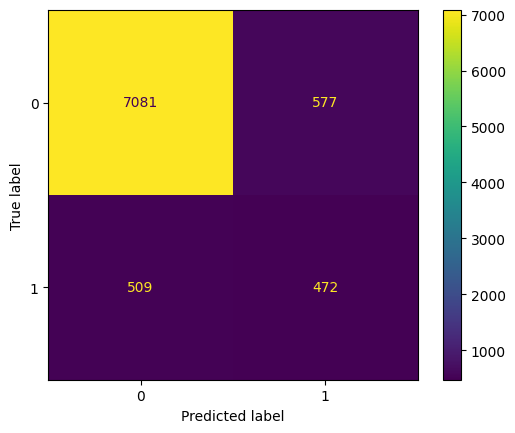

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8742910059034611

In [24]:
X.shape, y.shape

((43193, 26), (43193, 1))

In [25]:
datos = X.join(y)
datos.shape

(43193, 27)

In [26]:
datos_si = datos[datos.y == "yes"]
datos_si.shape

(5021, 27)

In [27]:
datos_no = datos[datos.y == "no"]
datos_no.shape

(38172, 27)

In [28]:
datos_no = datos_no.sample(n = 5021)
datos_no.shape

(5021, 27)

In [29]:
datos = pd.concat([datos_si, datos_no])
datos = datos.reset_index(drop=True)
datos.shape

(10042, 27)

In [30]:
datos.sample(n=10)

,age,education,default,balance,housing,loan,day_of_week,month,duration,campaign,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,y
5934,35,2,0.0,3297,1.0,0.0,29,7,193,15,...,False,False,False,False,True,False,False,True,False,no
2774,27,2,0.0,261,1.0,1.0,3,6,592,4,...,False,False,False,False,False,False,False,False,True,yes
1703,30,3,0.0,3473,0.0,0.0,12,3,1209,2,...,False,False,False,False,False,False,False,False,True,yes
8443,35,1,0.0,2708,1.0,0.0,30,5,178,2,...,False,False,False,False,False,False,False,True,False,no
335,58,2,0.0,25,0.0,0.0,9,6,486,3,...,False,False,False,False,False,False,False,True,False,yes
4934,47,2,0.0,3676,0.0,0.0,18,10,567,1,...,False,False,False,False,False,False,False,True,False,yes
3680,68,3,0.0,2820,0.0,0.0,3,12,154,1,...,True,False,False,False,False,False,False,True,False,yes
6134,42,3,0.0,473,1.0,0.0,6,4,494,1,...,False,False,False,False,False,False,False,False,True,no
7334,45,1,0.0,185,0.0,0.0,25,8,78,4,...,False,False,False,False,False,False,False,True,False,no
6810,32,3,0.0,258,1.0,1.0,18,11,197,1,...,False,False,False,False,False,False,False,True,False,no


In [31]:
y_new = datos[['y']]
X_new = datos.drop('y', axis=1)
X_new.shape, y_new.shape

((10042, 26), (10042, 1))

In [32]:
X_train, X_test = train_test_split(X_new, test_size = 0.2, random_state=42)
y_train, y_test = train_test_split(y_new, test_size = 0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8033, 26), (2009, 26), (8033, 1), (2009, 1))

In [33]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[803, 196],
       [232, 778]])

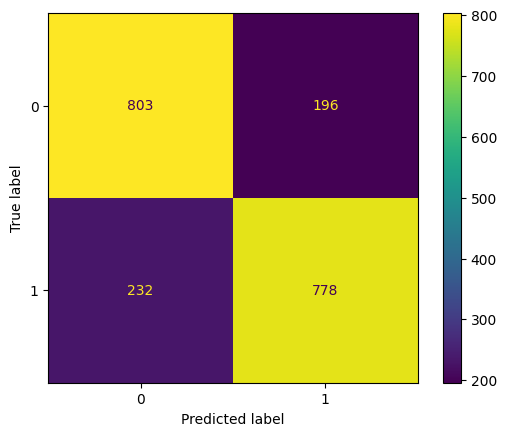

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [36]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7869586859133898

### Utilizando GridSearch y Validacion Cruzada

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [38]:
y_new = np.ravel(y_new)

In [44]:
#Lista de hyper parametros a probar (la libreria se encarga de combinarlos)
param_grid = [
    {'max_depth':[2, 5, 10],
     'min_samples_leaf':[10, 25, 50],
     'criterion':['gini', 'entropy']
    }
]
#Configurar el modelo a utilizar, junto con su lista de hyper params
modelo = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
modelo.fit(X_new, y_new)

#Validacion cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True)

#Obteniendo precision balanceada
accuracy = cross_val_score(modelo, X_new, y_new, cv=cv, 
                           scoring="balanced_accuracy")
print("Mejor modelo: {}".format(round(np.mean(accuracy), 3)))
print("Mejores parametros: {}".format(modelo.best_params_))

Mejor modelo: 0.803
Mejores parametros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50}


In [40]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(modelo, X_new, y_new, cv=cv)
cm = confusion_matrix(y_new, y_pred)
cm

array([[4060,  961],
       [ 874, 4147]])

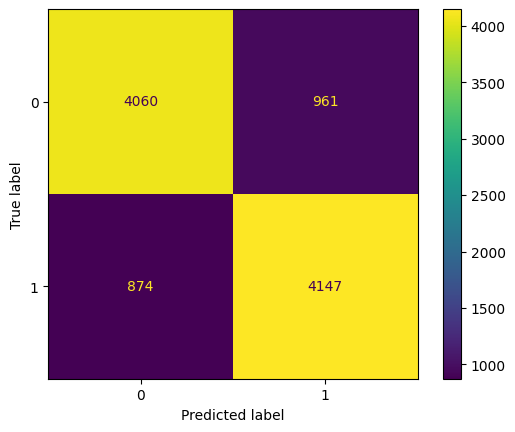

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [43]:
accuracy = accuracy_score(y_new, y_pred)
accuracy

0.8172674765982872

In [45]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(modelo, open(filename, 'wb'))